In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

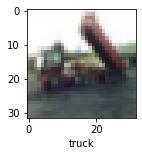

In [12]:
plot_sample(X_train, y_train, 2)

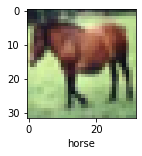

In [13]:
plot_sample(X_train, y_train, 7)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(4000, activation='relu'),
        layers.Dense(2000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.8039 - accuracy: 0.3580
Epoch 2/5
1563/1563 [==============================] - 172s 110ms/step - loss: 1.6137 - accuracy: 0.4299
Epoch 3/5
1563/1563 [==============================] - 172s 110ms/step - loss: 1.5335 - accuracy: 0.4602
Epoch 4/5
1563/1563 [==============================] - 173s 111ms/step - loss: 1.4708 - accuracy: 0.4834
Epoch 5/5
1563/1563 [==============================] - 173s 111ms/step - loss: 1.4218 - accuracy: 0.5003


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.33      0.41      1000
           1       0.67      0.41      0.51      1000
           2       0.36      0.34      0.35      1000
           3       0.34      0.34      0.34      1000
           4       0.48      0.30      0.37      1000
           5       0.47      0.24      0.32      1000
           6       0.46      0.59      0.52      1000
           7       0.78      0.31      0.44      1000
           8       0.27      0.93      0.41      1000
           9       0.58      0.33      0.42      1000

    accuracy                           0.41     10000
   macro avg       0.50      0.41      0.41     10000
weighted avg       0.50      0.41      0.41     10000



In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4513 - accuracy: 0.4750
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1067 - accuracy: 0.6108
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9819 - accuracy: 0.6559
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9047 - accuracy: 0.6851
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8389 - accuracy: 0.7082
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7796 - accuracy: 0.7278
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7323 - accuracy: 0.7431
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6847 - accuracy: 0.7595
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6427 - accuracy: 0.7741
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9476 - accuracy: 0.6887


[0.9475752115249634, 0.6887000203132629]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.63788010e-04, 4.63307789e-03, 1.06312102e-03, 9.72500920e-01,
        1.61460962e-03, 1.30539220e-02, 4.91392519e-03, 1.88481863e-05,
        7.07855972e-04, 1.22984464e-03],
       [4.07011807e-03, 1.19057903e-02, 8.81675192e-07, 5.27662323e-08,
        2.19954828e-08, 1.21627775e-08, 1.16355041e-08, 1.37272893e-09,
        9.83492732e-01, 5.30394376e-04],
       [3.64609271e-01, 6.87244162e-02, 9.39972466e-04, 1.42428325e-02,
        2.74142623e-03, 1.13048579e-03, 6.78546727e-04, 1.85068871e-03,
        5.00905991e-01, 4.41763327e-02],
       [7.85682499e-01, 8.68768897e-03, 5.40044047e-02, 3.80598847e-03,
        2.23103948e-02, 5.24747229e-05, 1.51746708e-03, 1.72287291e-05,
        1.23637974e-01, 2.83848873e-04],
       [2.41161206e-06, 8.78369756e-05, 2.54685082e-03, 7.76133016e-02,
        5.77745199e-01, 2.35097017e-03, 3.39590132e-01, 9.82900838e-06,
        3.76135613e-05, 1.59853680e-05]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

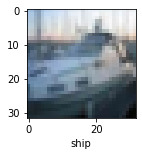

In [25]:
plot_sample(X_test, y_test,2)

In [26]:
classes[y_classes[2]]

'ship'